In [88]:
import os
import utils
from pyAudioAnalysis import audioBasicIO
from pyAudioAnalysis import audioFeatureExtraction
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
params = utils.yaml_to_dict('config.yml')
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')
Fs, x = audioBasicIO.readAudioFile(sample_audio_path)

In [3]:
t=np.linspace(0,len(x)/Fs,len(x))

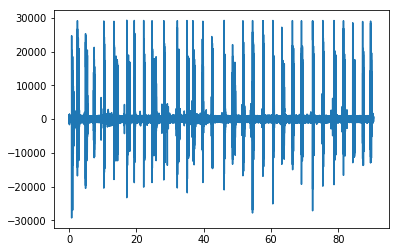

In [4]:
plt.plot(t,x)

In [5]:
print("FS:", Fs, "Output_size:", x.shape)

FS: 44100 Output_size: (3988970,)


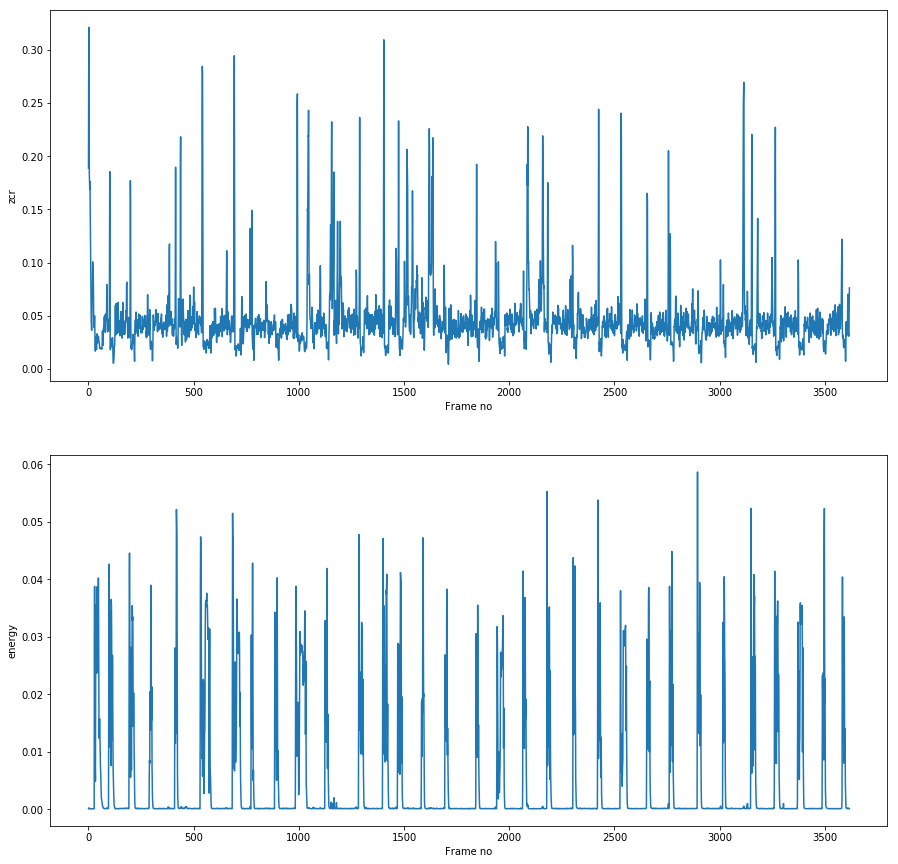

In [6]:
F, f_names = audioFeatureExtraction.stFeatureExtraction(x, Fs, 0.050*Fs, 0.025*Fs);
fig, axis = plt.subplots(2,1,figsize=(15,15))
plt.subplot(2,1,1); plt.plot(F[0,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[0]); 
plt.subplot(2,1,2); plt.plot(F[1,:]); plt.xlabel('Frame no'); plt.ylabel(f_names[1]); plt.show()

In [7]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Acelera','E-acelera_1.wav')
[fs, x] = audioBasicIO.readAudioFile(sample_audio_path)
x = audioBasicIO.stereo2mono(x)
specgram, TimeAxis, FreqAxis = audioFeatureExtraction.stSpectogram(x[:200000], fs, round(fs * 0.02),
round(fs * 0.01), False)

In [8]:
import math
def MySpectrogram(x,ven,inc):
    Nven = math.floor(len(x)/inc) - 1
    Ventanas = np.zeros((Nven,ven))
    Spectrogram = np.zeros((Nven,512))
    ini = 0
    for i in range(Nven):
        Ventanas[i,:]=x[ini:ini+ven]
        ini += inc
        temp = 10*np.log(np.abs(np.fft.fft(Ventanas[i,:],n=1024))**2)
        Spectrogram[i,:]=temp[:512]
    return Spectrogram

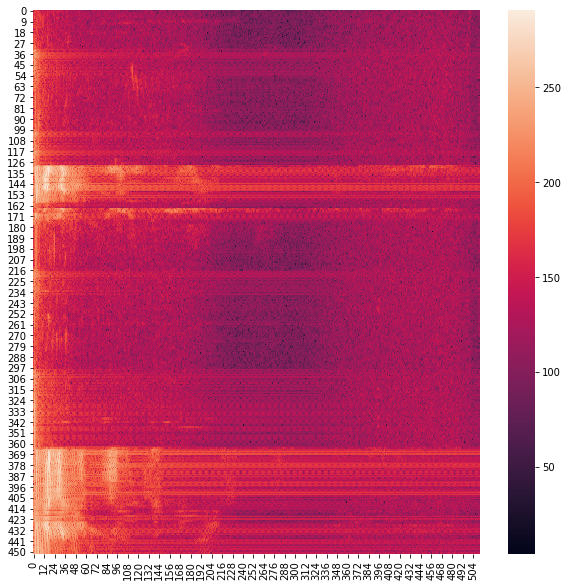

In [9]:
sample_audio_path = os.path.join(params['data_dir'],'audios','Arranca','E-arranca_1.wav')
[fs, x] = audioBasicIO.readAudioFile(sample_audio_path)
x = audioBasicIO.stereo2mono(x)
Sp = MySpectrogram(x[:200000], round(fs * 0.02),round(fs * 0.01))
fig, axis = plt.subplots(figsize=(10,10))
sns.heatmap(Sp)

In [19]:
records_list = list()
audios_path = os.path.join(params['data_dir'],'audios')
for word_records in os.listdir(audios_path):
    records_path = os.path.join(audios_path,word_records)
    for record in os.listdir(records_path):
        records_list.append(os.path.join(records_path,record))

In [ ]:
fig,axn = plt.subplots(4,8, sharex=True, sharey=True, figsize=(10,10))

for ax,audio in zip(axn.flat,records_list):
    
    audio_name = os.path.splitext(audio)[0]
    audio_name = audio_name.split('/')[-1]
    
    [fs, x] = audioBasicIO.readAudioFile(audio)
    x = audioBasicIO.stereo2mono(x)

    x = np.reshape(x,(-1,1)).astype(float)
    scaler = MinMaxScaler()
    x = scaler.fit_transform(x)

    x = np.reshape(x,(-1,))

    Sp = MySpectrogram(x[:200000], round(fs * 0.02),round(fs * 0.01))
    
    sns.heatmap(Sp, ax=ax,
                cbar=False,
                cbar_ax=None).set_title(audio_name)
    

/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/matplotlib/colors.py:957: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/matplotlib/colors.py:958: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/matplotlib/colors.py:512: Runtim

/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/envs/Keras/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/home/martin/anaconda3/envs/Keras/lib/py

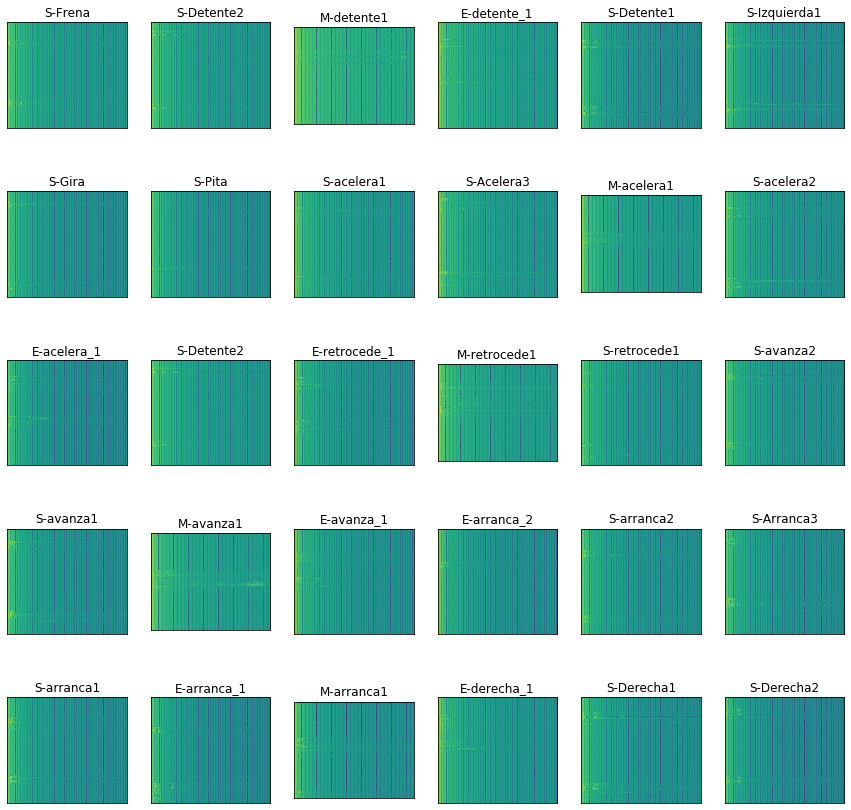

In [90]:
fig, axis = plt.subplots(5,6, figsize=(15,15))
k=0
for i in range(5):
    for j in range(6):
        
        audio = records_list[k]
        
        audio_name = os.path.splitext(audio)[0]
        audio_name = audio_name.split('/')[-1]
        
        [fs, x] = audioBasicIO.readAudioFile(audio)
        x = audioBasicIO.stereo2mono(x)
        
        x = np.reshape(x,(-1,1)).astype(float)
        scaler = MinMaxScaler()
        x = scaler.fit_transform(x)
        
        x = np.reshape(x,(-1,))
        
        Sp = MySpectrogram(x[:200000], round(fs * 0.02),round(fs * 0.01))
        
        axis[i][j].imshow(Sp)
        axis[i][j].title.set_text(audio_name)
        
        axis[i][j].get_xaxis().set_visible(False)
        axis[i][j].get_yaxis().set_visible(False)
        
        k += 1
plt.show()